In [7]:
import pickle

import torch
from reometry import utils
import reometry.hf_model

n = 10_000
filename = f"qwen-2-0.5b_L0_L23_P{n}_St30_Se0"
with open(f"stable_regions/{filename}.pkl", "rb") as f:
    id = pickle.load(f)
    dist = utils.calculate_resid_read_dist(id)
    dist_norm = dist / dist[:, -1:]
    dist_median = torch.median(dist_norm, dim=0).values
    inter_steps = dist.shape[1]
    max_deriv = dist_norm.diff(dim=1).max(dim=1).values * (inter_steps - 1)

input_ids = torch.load(f"stable_regions/{filename}_input_ids.pt")

In [8]:
hf_model = reometry.hf_model.HFModel.from_model_name(
    "qwen-2-0.5b",
    "cpu",
)
tokenizer = hf_model.tokenizer

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


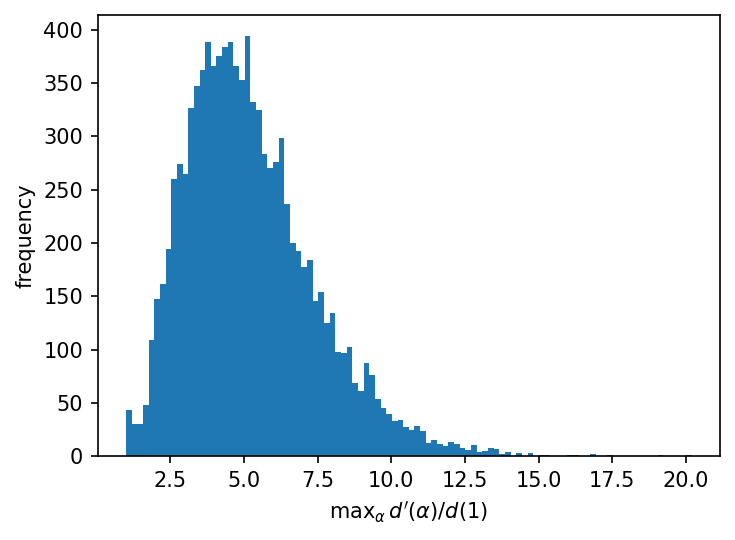

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3.7), dpi=150)
plt.hist(max_deriv.tolist(), bins=100)
plt.xlabel(r"$\text{max}_\alpha\,d'(\alpha)/d(1)$")
plt.ylabel("frequency")
plt.tight_layout()
plt.show()

In [10]:
# small_idxs = torch.nonzero(dist[:, -1] < 100, as_tuple=True)[0].tolist()
# large_idxs = torch.nonzero(dist[:, -1] > 250, as_tuple=True)[0].tolist()
small_idxs = torch.nonzero(max_deriv < 1.2, as_tuple=True)[0].tolist()
large_idxs = torch.nonzero(max_deriv > 10, as_tuple=True)[0].tolist()
import random

random.seed(0)
small_idxs = random.sample(small_idxs, k=20)
large_idxs = random.sample(large_idxs, k=20)

In [35]:
def decode_prompt(idx):
    decoded = tokenizer.decode(input_ids[idx])
    return f"``{decoded.__repr__()[1:-1].replace('\\', '\\textbackslash{}')}''"


def show_prompts(idxs):
    for idx in idxs:
        print(f"$p_A$ = {decode_prompt(idx)}\\\\")
        print(f"$p_B$ = {decode_prompt(idx + 1)}\\\\")
        print("\\\\")


print("small")
show_prompts(small_idxs)
print("large")
show_prompts(large_idxs)

small
$p_A$ = ``\textbackslash{}r\textbackslash{}n\textbackslash{}r\textbackslash{}nfor the little embellishments you speak of,''\\
$p_B$ = ``ckles' arrangements with the\textbackslash{}r\textbackslash{}n\textbackslash{}r\textbackslash{}n      Angel,''\\
\\
$p_A$ = ``\textbackslash{}r\textbackslash{}n\textbackslash{}r\textbackslash{}n\textbackslash{}r\textbackslash{}nOak then struck up “Jockey to the''\\
$p_B$ = `` nothing. The sale of big furniture barely paid the''\\
\\
$p_A$ = `` being out of the question, we did the\textbackslash{}r\textbackslash{}n\textbackslash{}r\textbackslash{}n''\\
$p_B$ = ``;\textbackslash{}r\textbackslash{}n\textbackslash{}r\textbackslash{}nAnd from about him fierce effusion rolled\textbackslash{}r\textbackslash{}n\textbackslash{}r\textbackslash{}n''\\
\\
$p_A$ = ``\textbackslash{}r\textbackslash{}n\textbackslash{}r\textbackslash{}n      it had scratched the varnish from the''\\
$p_B$ = ``ically; but shall be content\textbackslash{}r\textbackslash{}n\textbac